In [2]:
# Importing the dataset and getting into the library "dplyr"
install.packages("dplyr")
library(dplyr)
library(readr)
clvData1 <- read_csv("C:/Users/Dell/Desktop/DC Datasets/ML for Marketing Analytcis/clvData1.csv")
head(clvData1)

Installing package into 'C:/Users/Dell/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'dplyr' is in use and will not be installed"Parsed with column specification:
cols(
  customerID = col_double(),
  nOrders = col_double(),
  nItems = col_double(),
  daysSinceLastOrder = col_double(),
  margin = col_double(),
  returnRatio = col_double(),
  shareOwnBrand = col_double(),
  shareVoucher = col_double(),
  shareSale = col_double(),
  gender = col_character(),
  age = col_double(),
  marginPerOrder = col_double(),
  marginPerItem = col_double(),
  itemsPerOrder = col_double(),
  futureMargin = col_double()
)


customerID,nOrders,nItems,daysSinceLastOrder,margin,returnRatio,shareOwnBrand,shareVoucher,shareSale,gender,age,marginPerOrder,marginPerItem,itemsPerOrder,futureMargin
2,4,7,4,35.77,0.25,0.67,0.17,0.00,female,56,8.94,5.11,1.75,57.62
3,3,4,272,25.74,0.44,0.33,0.00,0.67,male,37,8.58,6.43,1.33,29.69
4,12,25,12,63.32,0.15,0.86,0.38,0.29,male,32,5.28,2.53,2.08,56.26
5,16,29,32,53.74,0.03,0.96,0.17,0.33,female,43,3.36,1.85,1.81,58.84
6,1,2,47,35.85,0.00,1.00,0.00,1.00,male,48,35.85,17.93,2.00,29.31
7,2,8,19,22.02,0.18,0.00,0.86,0.14,female,31,11.01,2.75,4.00,35.72


Installing package into 'C:/Users/Dell/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'corrplot' is in use and will not be installed"

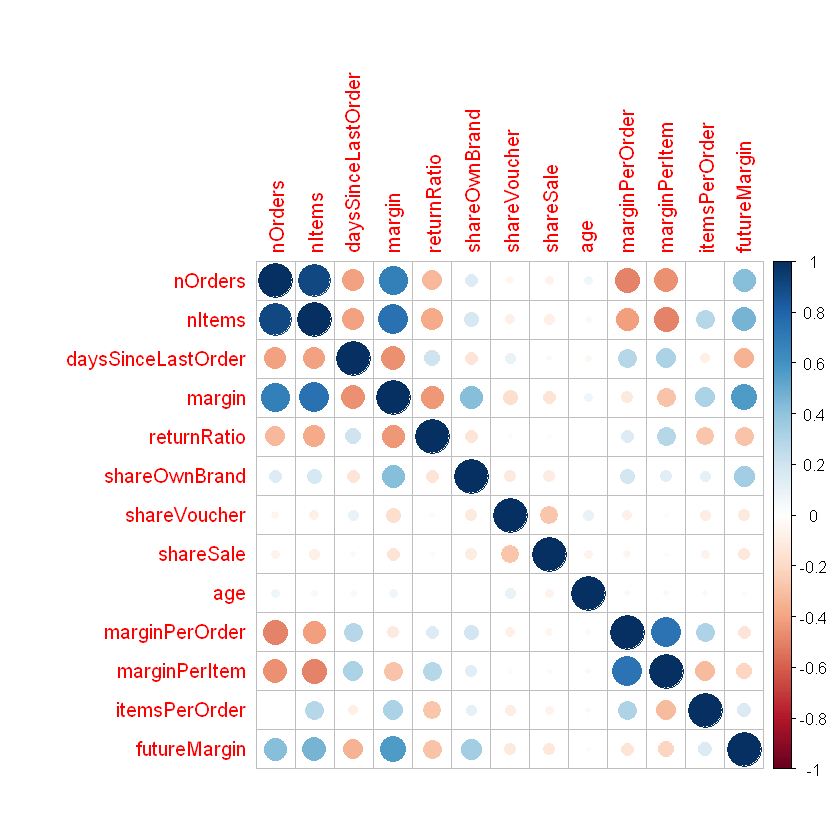

In [7]:
# Plotting the Correlations with "corrplot" library
install.packages("corrplot")
library(corrplot)
clvData1 %>% select_if(is.numeric) %>%
select(-customerID) %>% cor() %>% corrplot()

In [8]:
# Building the Multiple Regression Model
multipleLM <- lm(futureMargin ~ ., data = clvData1)
summary(multipleLM)


Call:
lm(formula = futureMargin ~ ., data = clvData1)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.475  -8.890   0.598   9.486  49.648 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        21.9359222  1.4748963  14.873  < 2e-16 ***
customerID          0.0001883  0.0001086   1.734  0.08306 .  
nOrders            -0.0275014  0.1229755  -0.224  0.82305    
nItems              0.1336084  0.0710157   1.881  0.05999 .  
daysSinceLastOrder -0.0161501  0.0026913  -6.001 2.13e-09 ***
margin              0.4055540  0.0273384  14.835  < 2e-16 ***
returnRatio        -1.9330839  0.6014411  -3.214  0.00132 ** 
shareOwnBrand       7.6136462  0.6791437  11.211  < 2e-16 ***
shareVoucher       -1.7953640  0.6693942  -2.682  0.00735 ** 
shareSale          -2.9377340  0.6905772  -4.254 2.15e-05 ***
gendermale          0.1873098  0.4293795   0.436  0.66269    
age                -0.0116967  0.0172716  -0.677  0.49830    
marginPerOrder     -0.2062556 

In [9]:
# Variation Inflation Factors (VIF) - Checking Collinearity Systemathically
library(rms)
vif(multipleLM)

Warning message:
"package 'rms' was built under R version 3.6.3"Loading required package: Hmisc
Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: SparseM
Warning message:
"package 'SparseM' was built under R version 3.6.2"
Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



customerID            nOrders             nItems daysSinceLastOrder 
          1.012415          11.570491          13.154747           1.376929 
            margin        returnRatio      shareOwnBrand       shareVoucher 
          3.670801           1.311641           1.365176           1.182394 
         shareSale         gendermale                age     marginPerOrder 
          1.149264           1.003560           1.028741           8.983105 
     marginPerItem      itemsPerOrder 
          7.784012           6.659134

In [12]:
# Building a New Model based on VIF values
multipleLM2 <- lm(futureMargin ~ . -nItems -marginPerOrder, data = clvData1)
vif(multipleLM2)

customerID            nOrders daysSinceLastOrder             margin 
          1.011277           2.868462           1.363219           3.572144 
       returnRatio      shareOwnBrand       shareVoucher          shareSale 
          1.305601           1.355414           1.177601           1.147137 
        gendermale                age      marginPerItem      itemsPerOrder 
          1.003231           1.023680           1.687288           1.551398

In [13]:
# Statistical Significance
summary(multipleLM2)


Call:
lm(formula = futureMargin ~ . - nItems - marginPerOrder, data = clvData1)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.366  -8.798   0.538   9.536  49.939 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        22.2342265  1.3270692  16.754  < 2e-16 ***
customerID          0.0001906  0.0001088   1.753 0.079730 .  
nOrders             0.2189831  0.0613361   3.570 0.000361 ***
daysSinceLastOrder -0.0168144  0.0026825  -6.268 4.02e-10 ***
margin              0.4067445  0.0270151  15.056  < 2e-16 ***
returnRatio        -1.9831089  0.6010904  -3.299 0.000978 ***
shareOwnBrand       7.5241955  0.6778792  11.100  < 2e-16 ***
shareVoucher       -1.7135963  0.6691892  -2.561 0.010481 *  
shareSale          -2.9139569  0.6911288  -4.216 2.54e-05 ***
gendermale          0.2112844  0.4300500   0.491 0.623239    
age                -0.0165479  0.0172588  -0.959 0.337710    
marginPerItem      -0.1988837  0.0511559  -3.888 0.000103 ***
item

In [21]:
# Predicting on the test data
clvData2 <- read_csv("C:/Users/Dell/Desktop/DC Datasets/ML for Marketing Analytcis/clvData2.csv")
clvData2$predMargin <- predict(multipleLM2, newdata=clvData2)

Parsed with column specification:
cols(
  customerID = col_double(),
  nOrders = col_double(),
  nItems = col_double(),
  daysSinceLastOrder = col_double(),
  margin = col_double(),
  returnRatio = col_double(),
  shareOwnBrand = col_double(),
  shareVoucher = col_double(),
  shareSale = col_double(),
  gender = col_character(),
  age = col_double(),
  marginPerOrder = col_double(),
  marginPerItem = col_double(),
  itemsPerOrder = col_double()
)


In [22]:
# Data frame displaying X, Y, Yhat and residuals with broom package
library(broom)
multipleLM2 %>% tidy()

term,estimate,std.error,statistic,p.value
(Intercept),22.2342265368,1.327069208,16.754384,4.960096e-61
customerID,0.0001906409,0.000108771,1.752681,7.973007e-02
nOrders,0.2189830549,0.061336113,3.570214,3.607031e-04
daysSinceLastOrder,-0.0168143526,0.002682490,-6.268190,4.022461e-10
margin,0.4067445373,0.027015057,15.056216,6.276959e-50
returnRatio,-1.9831088519,0.601090402,-3.299186,9.777825e-04
shareOwnBrand,7.5241954861,0.677879239,11.099610,3.115209e-28
shareVoucher,-1.7135962696,0.669189250,-2.560705,1.048084e-02
shareSale,-2.9139568923,0.691128796,-4.216228,2.536783e-05
gendermale,0.2112844473,0.430050045,0.491302,6.232387e-01


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 181 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 181 rows containing missing values (geom_point)."

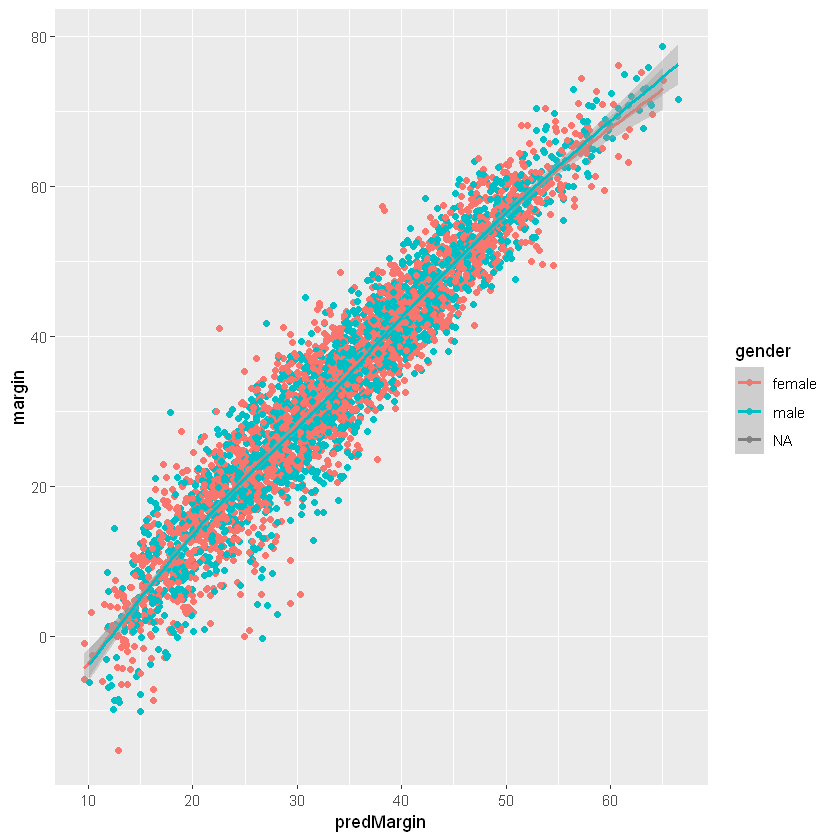

In [43]:
# Visualizing actual observations, regression line and new predictions together
ggplot(clvData2, aes(x=predMargin, y=margin, color=gender)) +
geom_point() + geom_smooth()